1.Install and Import Dependencies

In [1]:
#Installation of the PyTorch 

!pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121

Looking in indexes: https://download.pytorch.org/whl/cu121


In [2]:
#Clonning the YoLo5 Form the Ultralytics 

!git clone https://github.com/ultralytics/yolov5

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [3]:
#Installing the requirements for the YoLoV5 

!cd yolov5 & pip install -r requirements.txt

In [1]:
#importing the libraries

import torch # for Detection 
from matplotlib import pyplot as plt # matplotlib for visualition 
import numpy as np #for methematical 
import cv2 # for camera 

2. Load Model

In [5]:
#Pre-Trained YoLov5 Model Load 

model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in C:\Users\vaghe/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2024-12-23 Python-3.12.1 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [6]:
#Cheacking the Model is Load or not 

model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

5.Train from scratch

In [2]:
#Unique indenfiesr

import uuid # unique id create 
import os # system path 
import time 

In [21]:
base_path = r'D:\Student Behaviour Detection'
IMAGES_PATH = os.path.join(base_path, 'data', 'images')  #data/images
labels = ['Hand Raising','Using Phone','Writting','Peter Parker','AB','Manali','Mahi']
number_imgs = 20

In [22]:
cap = cv2.VideoCapture(1)

# Set up a fullscreen window
#cv2.namedWindow("Image Collection", cv2.WND_PROP_FULLSCREEN)
#cv2.setWindowProperty("Image Collection", cv2.WND_PROP_FULLSCREEN, cv2.WINDOW_FULLSCREEN)

# Loop through labels
for label in labels:
    print('Collecting images for {}'.format(label))
    time.sleep(5)
    
    # Loop through image range
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        
        # Webcam feed
        ret, frame = cap.read()
        
        # Naming out image path
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        
        # Writes out image to file 
        cv2.imwrite(imgname, frame)
        
        # Render to the screen in fullscreen mode
        cv2.imshow("Image Collection", frame)
        
        # 2 second delay between captures
        time.sleep(2)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()


In [23]:
print(os.path.join(IMAGES_PATH, labels[0]+'.'+str(uuid.uuid1())+'.jpg'))

D:\Student Behaviour Detection\data\images\Hand Raising.8076e077-c680-11ef-bd15-9480a7aba4d1.jpg


In [24]:
for label in labels:
    print('Collecting images for {}'.format(label))
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        print(imgname)   

D:\Student Behaviour Detection\data\images\Hand Raising.80c61785-c680-11ef-b638-9480a7aba4d1.jpg
D:\Student Behaviour Detection\data\images\Hand Raising.80c61786-c680-11ef-be70-9480a7aba4d1.jpg
D:\Student Behaviour Detection\data\images\Hand Raising.80c61787-c680-11ef-a43e-9480a7aba4d1.jpg
D:\Student Behaviour Detection\data\images\Hand Raising.80c61788-c680-11ef-88b8-9480a7aba4d1.jpg
D:\Student Behaviour Detection\data\images\Hand Raising.80c61789-c680-11ef-aab2-9480a7aba4d1.jpg
D:\Student Behaviour Detection\data\images\Hand Raising.80c6178a-c680-11ef-9400-9480a7aba4d1.jpg
D:\Student Behaviour Detection\data\images\Hand Raising.80c6178b-c680-11ef-a167-9480a7aba4d1.jpg
D:\Student Behaviour Detection\data\images\Hand Raising.80c6178c-c680-11ef-aaed-9480a7aba4d1.jpg
D:\Student Behaviour Detection\data\images\Hand Raising.80c6178d-c680-11ef-baa7-9480a7aba4d1.jpg
D:\Student Behaviour Detection\data\images\Hand Raising.80c6178e-c680-11ef-9adb-9480a7aba4d1.jpg
D:\Student Behaviour Detection

In [12]:
!git clone https://github.com/tzutalin/labelImg

fatal: destination path 'labelImg' already exists and is not an empty directory.


In [13]:
!pip install pyqt5 lxml --upgrade
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

In [16]:
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 400 --data dataset.yaml --weights yolov5s.pt --workers 2

train: weights=yolov5s.pt, cfg=, data=dataset.yaml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=400, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data\hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest, ndjson_console=False, ndjson_file=False
github:  YOLOv5 is out of date by 1 commit. Use 'git pull' or 'git clone https://github.com/ultralytics/yolov5' to update.
YOLOv5  v7.0-389-ge62a31b6 Python-3.12.1 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epoc

6. Load Custom Model

In [3]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp5/weights/last.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\vaghe/.cache\torch\hub\master.zip
YOLOv5  2025-1-12 Python-3.12.1 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)

Fusing layers... 
Model summary: 157 layers, 7064065 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


In [4]:
img = os.path.join('data', 'images', 'Peter Parker.25390065-c680-11ef-9aa7-9480a7aba4d1.jpg')

In [5]:
results = model(img)

C:\Users\vaghe/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


In [6]:
results.print()

image 1/1: 480x640 1 Peter Parker
Speed: 653.1ms pre-process, 110.7ms inference, 37.0ms NMS per image at shape (1, 3, 480, 640)


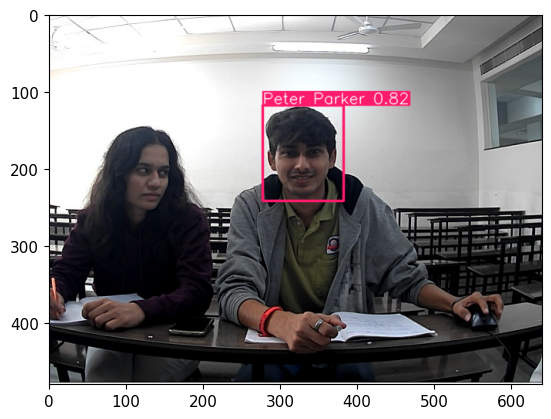

In [7]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [ ]:
import cv2
import numpy as np

cap = cv2.VideoCapture(1)

# Set up a fullscreen window
cv2.namedWindow("YOLO", cv2.WND_PROP_FULLSCREEN)
cv2.setWindowProperty("YOLO", cv2.WND_PROP_FULLSCREEN, cv2.WINDOW_FULLSCREEN)
 
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    
    # Make detections
    results = model(frame)
    
    # Display results in fullscreen window
    cv2.imshow("YOLO", np.squeeze(results.render()))
    
    # Break loop on 'q' key press
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


C:\Users\vaghe/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\vaghe/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\vaghe/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\vaghe/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\vaghe/.cache\torch\hub\ultralytics_yolov5_master\models